## **To recreate study results please load package versions found in hotspot_requirements.txt**

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import math
import seaborn as sns
import os
# %config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2

sc.settings.verbosity = 0
sc.logging.print_header()
sns.set_context("paper")

scanpy==1.10.3 anndata==0.10.9 umap==0.5.7 numpy==1.26.4 scipy==1.13.1 pandas==2.2.3 scikit-learn==1.6.1 statsmodels==0.14.4 igraph==0.8.3 pynndescent==0.5.13


In [2]:
# import local module containing misc code, helps keep notebooks clean from commonly used functions
import new_misc_code as nmc 

In [3]:
import hotspot
hotspot.__version__

'0.9.1'

# **Load data**

In [4]:
adata = sc.read( "../data/Processed_data_RNA-all_full-counts-and-downsampled-CPM.h5ad")
adata.shape

(154748, 26747)

## DBM - Data Quality Checks

In [5]:
# 🛠️ Basic Checks to Confirm AnnData
print("✅ Checking adata object...\n")
print("Type:", type(adata))
print("Shape (cells, genes):", adata.shape)

# View first few rows of metadata
display(adata.obs.head())
display(adata.var.head())

# Check if matrix has NaNs or Infs
import numpy as np

if isinstance(adata.X, np.ndarray):
    print("Matrix Type: Dense Matrix")
    print("NaNs present:", np.isnan(adata.X).any())
    print("Infs present:", np.isinf(adata.X).any())
else:
    print("Matrix Type: Sparse Matrix")
    print("NaNs present:", np.isnan(adata.X.data).any())
    print("Infs present:", np.isinf(adata.X.data).any())

✅ Checking adata object...

Type: <class 'anndata._core.anndata.AnnData'>
Shape (cells, genes): (154748, 26747)


,batch,RL#,age,chem,concat_id,numerical_age,stage_id,Sex,Race,PMI,...,mj_dev_traj_VIP,mj_dev_traj_OPC,mj_dev_traj_PV,mj_dev_traj_PV_SCUBE3,mj_dev_traj_ID2,mj_dev_traj_Oligo,mj_dev_traj_LAMP5_NOS1,mj_dev_traj_Micro,mj_dev_traj_Vas,mj_dev_traj_Poor-Quality
AAACCTGAGAGTCGGT-RL1612_34d_v2,RL1612_34d_v2,RL1612,34d,v2,0,0.093151,Neonatal,M,AA,5,...,None,None,None,None,None,None,None,None,None,None
AAACCTGAGCCGCCTA-RL1612_34d_v2,RL1612_34d_v2,RL1612,34d,v2,0,0.093151,Neonatal,M,AA,5,...,None,None,None,None,None,None,None,None,None,None
AAACCTGAGTCGAGTG-RL1612_34d_v2,RL1612_34d_v2,RL1612,34d,v2,0,0.093151,Neonatal,M,AA,5,...,None,None,None,None,None,None,None,None,None,None
AAACCTGAGTGAACAT-RL1612_34d_v2,RL1612_34d_v2,RL1612,34d,v2,0,0.093151,Neonatal,M,AA,5,...,None,None,None,None,None,None,None,None,None,None
AAACCTGCAAGGACTG-RL1612_34d_v2,RL1612_34d_v2,RL1612,34d,v2,0,0.093151,Neonatal,M,AA,5,...,None,None,None,None,None,None,None,None,None,None


,gene_ids,feature_types,non-unique_names,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
RP11-34P13.7,ENSG00000238009,Gene Expression,RP11-34P13.7,1045,0.006908,0.006884,99.324709,1069.0,6.975414,1180.0,146,False,0.664505,6.906880,-0.315939
AL627309.1,ENSG00000237683,Gene Expression,AL627309.1,636,0.004291,0.004282,99.589009,664.0,6.499787,760.0,127,False,0.599243,6.907004,-0.314168
RP11-34P13.14,ENSG00000239906,Gene Expression,RP11-34P13.14,49,0.000317,0.000317,99.968336,49.0,3.912023,54.0,12,False,0.074692,6.907768,-0.210907
AP006222.2,ENSG00000228463,Gene Expression,AP006222.2,11721,0.087142,0.083552,92.425750,13485.0,9.509407,14799.0,1797,False,2.544904,6.918009,-0.226686
RP4-669L17.10,ENSG00000237094,Gene Expression,RP4-669L17.10,16003,0.118825,0.112279,89.658671,18388.0,9.819508,20245.0,2956,False,3.014258,6.916397,-0.467432


Matrix Type: Sparse Matrix
NaNs present: False
Infs present: False


In [6]:
# remove poor quality cells
poor_mk = adata.obs['major_clust']=='Poor-Quality'
adata = adata[~poor_mk]
adata.shape

(153473, 26747)

## **Subset Cells to 5000 cells - David**

In [7]:
# Step 1: Downsample randomly to 5,000 cells
import numpy as np
np.random.seed(42)  # For reproducibility
selected_cells = np.random.choice(adata.obs_names, size=5000, replace=False)
adata = adata[selected_cells].copy()

# Step 2: Select top 7,000 most expressed genes (by total counts)
# Compute total expression (summing across all cells)
gene_counts = np.array(adata.X.sum(axis=0)).flatten()

# Get top 7,000 gene indices
top_gene_indices = np.argsort(gene_counts)[-7000:]

# Subset by these genes
adata = adata[:, top_gene_indices].copy()

# Final shape
print("Subset shape:", adata.shape)  # (5000, 7000)

Subset shape: (5000, 7000)


In [8]:
sc.pp.filter_genes( adata, min_cells=5)

In [9]:
adata.shape

(5000, 7000)

In [10]:
# david addition - log transform the data prior to running highly variable genes function; seems to be fixed
# compatability problem with loading seurat data into scanpy: https://github.com/scverse/scanpy/issues/763
sc.pp.log1p(adata)

In [11]:
# select for HVGs using downsampled and normalized data
# David - change from 5,000 to 400 highly variable genes
hvg_th = 400
sc.pp.highly_variable_genes( adata, n_top_genes=hvg_th, n_bins=20, flavor='seurat', inplace=True)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [12]:
# select for HVGs
high_adata = adata[:,adata.var.highly_variable.values]
high_adata.shape

(5000, 400)

In [13]:
#test david
print(adata.layers.keys())

KeysView(Layers with keys: ds_norm_cts)


In [14]:
# Hotspot will require the use of raw (non-downsampled) counts as well
# david - comment out the below line b/c raw counts are now already stored in adata.X
# adata.X = adata.layers['raw-cts_pre-ds'].copy()

raw = adata[:, adata.var.highly_variable.values]
raw.shape

(5000, 400)

# **PCA**
PCA has already been ran just need to adjust to only use 50% of variation

In [15]:
# this number taken from previous notebook 3__whole-tissue_clustering.ipynb and is equal 50% of variation
comps = 365
pca = adata.obsm['X_pca'][:,:comps]

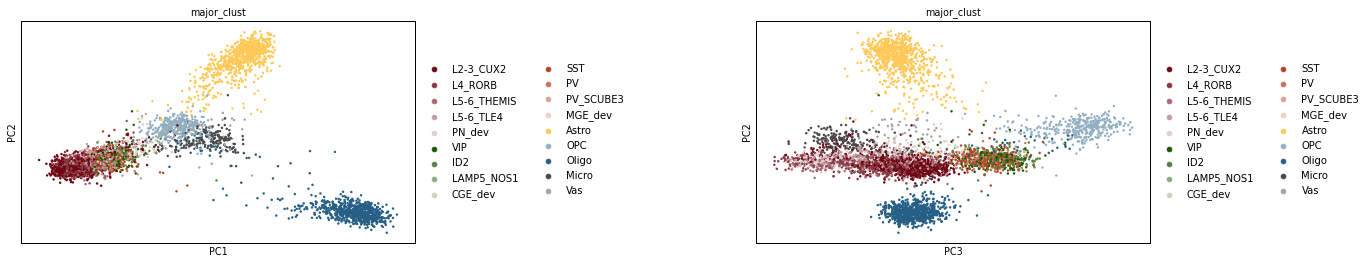

In [16]:
sc.pl.pca( high_adata, color=['major_clust'], components=['1,2','3,2'], legend_fontsize=10, wspace=0.70)


# **Hotspot**

In [17]:
# reformat data for hotspot
counts = raw.to_df()
counts = counts.T
lat_df = pd.DataFrame( pca, index=counts.columns)

In [18]:
# Create the Hotspot object and the neighborhood graph
hs = hotspot.Hotspot( counts, model='danb', latent=lat_df)

In [19]:
# this will take a while to run, consider saving it if you would like repeated access to it. 
hs.create_knn_graph( weighted_graph=True, n_neighbors=25)

In [20]:
hs_results = hs.compute_autocorrelations( jobs=1)#switched jobs=25 to jobs=1
hs_results.head()

100%|████████████████████████████████████████| 400/400 [00:00<00:00, 782.45it/s]


,C,Z,Pval,FDR
Gene,,,,
DOCK8,0.826912,898.801852,0.0,0.0
APBB1IP,0.794265,898.460411,0.0,0.0
C10orf11,0.799737,718.568775,0.0,0.0
PLP1,0.916627,568.651949,0.0,0.0
ST18,0.907781,563.788639,0.0,0.0


In [21]:
#nmc.save_obj( hs, "../data/hotspot.pkl")
nmc.save_obj( hs, "../data/hotspot_SUBSET.pkl")

In [22]:
adata.uns['major_clust_colors']

array(['#6e0614', '#8b3843', '#a86a72', '#c59ba1', '#e2cdd0', '#1c5701',
       '#558140', '#8eab80', '#c6d5c0', '#b44622', '#c77459', '#daa290',
       '#ecd1c8', '#ffc857', '#92afc2', '#255f85', '#484848', '#a3a3a3'],
      dtype=object)

In [23]:
# Select the genes with significant lineage autocorrelation
# David - gets to here with full dataset, now downsampled
hs_genes = hs_results.loc[hs_results.FDR < 0.05].sort_values('Z', ascending=False).index

In [25]:
# Compute pair-wise local correlations between these genes
# This will also take quite a long while to run (>24hrs on 25 cores)
# change jobs from 25 to 1
lcz = hs.compute_local_correlations( hs_genes, jobs=1)

Computing pair-wise local correlation on 400 features...


100%|███████████████████████████████████| 79800/79800 [00:21<00:00, 3747.79it/s]


In [26]:
#nmc.save_obj( hs, "../data/hotspot.pkl")
nmc.save_obj( hs, "../data/hotspot_SUBSET.pkl")

In [27]:
# # Select the genes with significant lineage autocorrelation                        ################
# hs_genes = hs_results.loc[hs_results.FDR < 0.05].sort_values('Z', ascending=False).index
#                                                                                    ################
# # Compute pair-wise local correlations between these genes
# lcz = hs.compute_local_correlations( hs_genes, jobs=90)

In [28]:
# dta.save_obj( hs, "hotspot_data/hs_FULL-whole-tissue_pc365-feat-5k_NN25")
# lcz.to_csv( "hotspot_data/lcz_FULL-whole-tissue_pc365-feat-5k_NN25")

### Read in prior ran HOTSPOT session

In [29]:
# hs = dta.load_obj( "/scratchfs/cherring/brain_maturation/analysis/data/hs_FULL-whole-tissue_pc365-feat-5k_NN25.pkl")

In [30]:
### threshold of 25 works, 150 for large modules
modules = hs.create_modules(
    min_gene_threshold=65, core_only=True, fdr_threshold=0.05
)
modules.value_counts()

Module
 1    174
-1    136
 2     90
Name: count, dtype: int64

In [31]:
### threshold of 25 works, 150 for large modules
modules = hs.create_modules(
    min_gene_threshold=65, core_only=True, fdr_threshold=0.05
)
modules.value_counts()

Module
 1    174
-1    136
 2     90
Name: count, dtype: int64

In [32]:
modules

Gene
DOCK8           -1
APBB1IP         -1
C10orf11        -1
PLP1            -1
ST18            -1
                ..
AL163953.3      -1
LINC00276        1
ZNF331          -1
AC007319.1      -1
RP11-410D17.2    1
Name: Module, Length: 400, dtype: int64

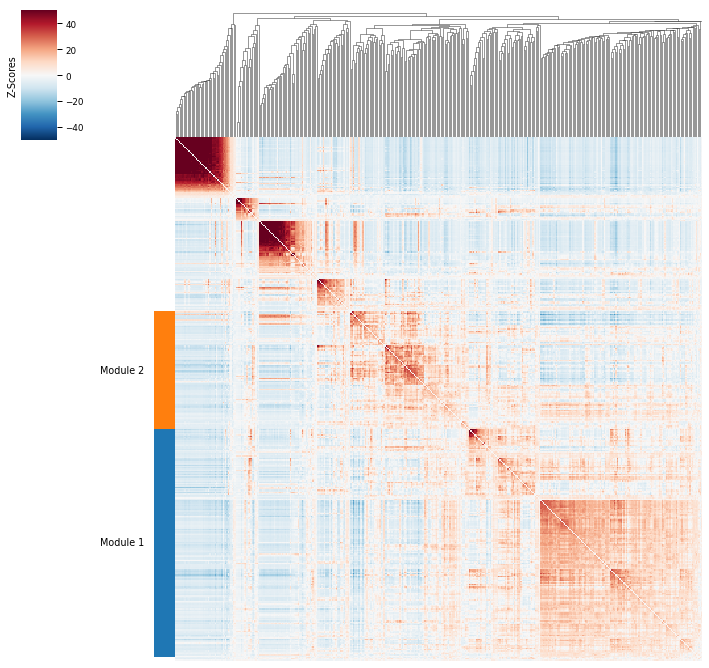

In [33]:
hs.plot_local_correlations(vmin=-50, vmax=50)

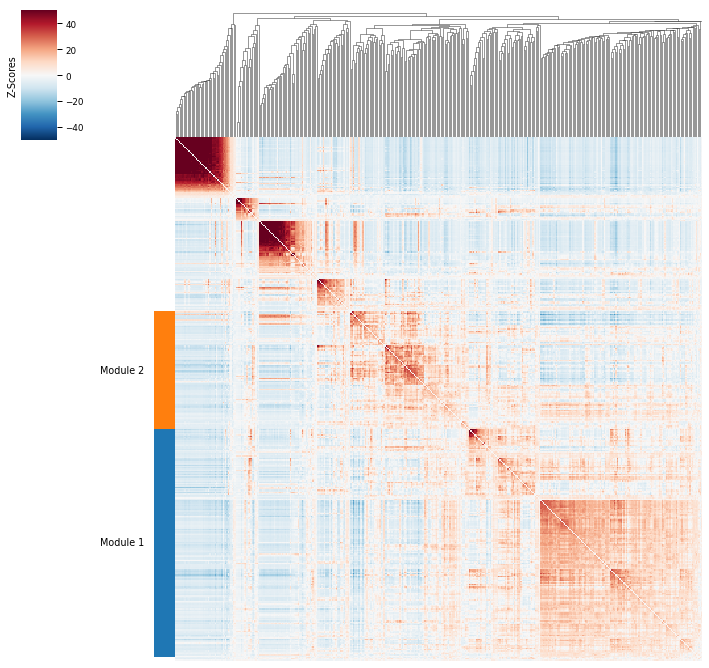

In [34]:
hs.plot_local_correlations(vmin=-50, vmax=50)

In [35]:
module_scores = hs.calculate_module_scores()
module_scores.head()

Computing scores for 2 modules...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  4.01it/s]


,1,2
TGCTCCACAAACGGCA-RL2128_20yr_v3,-2.939783,-2.099727
GAATCACGTGCCGTAC-RL1777_2d_v3,-1.893862,-0.553152
GAAATGAAGTGGGATC-RL1613_2yr_v2,-2.601665,-1.510128
TCGCGAGGTGCGCTTG-RL1613_2yr_v2,-2.654393,-1.404659
AAATGGACATCGATCA-RL2131_17yr_v3,8.055696,-2.287213


In [36]:
umap = adata.obsm['X_umap']

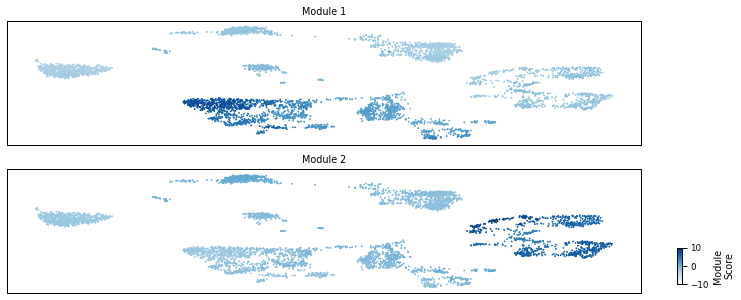

In [37]:
 # subplot params
n    = max( hs.modules.unique())
cols = round( math.sqrt( n))
rows = math.ceil( n / cols)
size = cols * rows

fig, axs = plt.subplots( rows, cols, figsize=(rows*5,cols*5))
cax = fig.add_axes(
    [.95, .15, .007, .1]
)
for itr, (ax, mod) in enumerate( zip( axs.ravel(), hs.module_scores.columns)):
    ax.set_facecolor( 'white')
    scp = hs.module_scores[mod]
    vmin = -10
    vmax = 10
    plt.sca(ax)
    scp = plt.scatter(
        umap[:,0], umap[:,1],
        s=1, c=scp, vmin=vmin, vmax=vmax,
        rasterized=True, cmap='Blues')
    plt.xticks([])
    plt.yticks([])
    plt.title("Module {}".format(mod))
# clear rest of graphs
for ii in range( itr+1, size):
    ax = axs.flatten()[ii]
    ax.axis('off')
        
plt.subplots_adjust(hspace=0.2)
plt.colorbar(scp, cax=cax, label='Module\nScore')
plt.subplots_adjust(left=0.02, right=0.9)

In [38]:
# rename modules to match order of paper
pap_dict = {14:'M1', 4:'M2', 11:'M3', 6:'M4', 7:'M5', 12:'M6', 3:'M7', 5:'M8', 1:'M9', 10:'M10', 2:'M11', 9:'M12', 8:'M13', 13:'M14', -1:'Not_Significant'}
pap_df = modules.to_frame()
pap_df.rename(columns={'Module':'Hotspot_ID'}, inplace=True)
pap_df['Hotspot_Module'] = [pap_dict[ii] for ii in pap_df['Hotspot_ID']]

In [39]:
pap_df

,Hotspot_ID,Hotspot_Module
Gene,,
DOCK8,-1,Not_Significant
APBB1IP,-1,Not_Significant
C10orf11,-1,Not_Significant
PLP1,-1,Not_Significant
ST18,-1,Not_Significant
...,...,...
AL163953.3,-1,Not_Significant
LINC00276,1,M9
ZNF331,-1,Not_Significant


In [61]:
#David - adjust output path
#pap_df.to_csv( "/dd_userdata/usrdat03/userdata/cherring/data/cellranger_outputs/brain_maturation_RNA/output_data/Hotspot_gene_modules.csv")
pap_df.to_csv( "../data/output_data/Hotspot_SUBSET_gene_modules.csv")

### Check modules for negative correlation

In [42]:
# to test for negative regulation need to comapare means for cluster1 (largest and oligo cluster) with mean from all cells not in oligo cluster, if more than oligo mean then I may have problems
# this test did not result in any genes in module 1 having higher mean expression outside of oligos than within oligos
# also checked module 2 with Micro and non are higher in than out
# so HOTSPOT only picks up positive correlations

In [43]:
# get all modules in a dataframe
all_mods = hs.results.join(hs.modules)
all_mods.dropna( inplace=True)
# drop non assigned genes
all_mods = all_mods[all_mods['Module']!=-1.0]
all_mods.shape

(264, 5)

In [52]:
mod1_genes = all_mods[all_mods['Module']==3.0].index.values
olig_mk = adata.obs['major_clust']=='Astro'
for g_itr in mod1_genes:
    g_mk = adata.var_names==g_itr
    olig_mean = adata[olig_mk,g_mk].X.mean()
    other_mean = adata[~olig_mk,g_mk].X.mean()
    #david - add print below
    print(f"{g_itr}: olig_mean = {olig_mean:.2f}, other_mean = {other_mean:.2f}")
    if( olig_mean<other_mean):
        print( g_itr)
#     print( sum( g_mk))

In [53]:
olig_mean, other_mean

NameError: name 'olig_mean' is not defined

In [56]:
# Error above, b/c no modules with value at 3
# Print(all_mods)
print(all_mods['Module']==3.0)

Gene
CCBE1            False
NXPH1            False
CSRP2            False
ADARB2           False
KLHL1            False
                 ...  
ATP1B3           False
RP11-758M4.1     False
RP11-649G15.2    False
LINC00276        False
RP11-410D17.2    False
Name: Module, Length: 264, dtype: bool


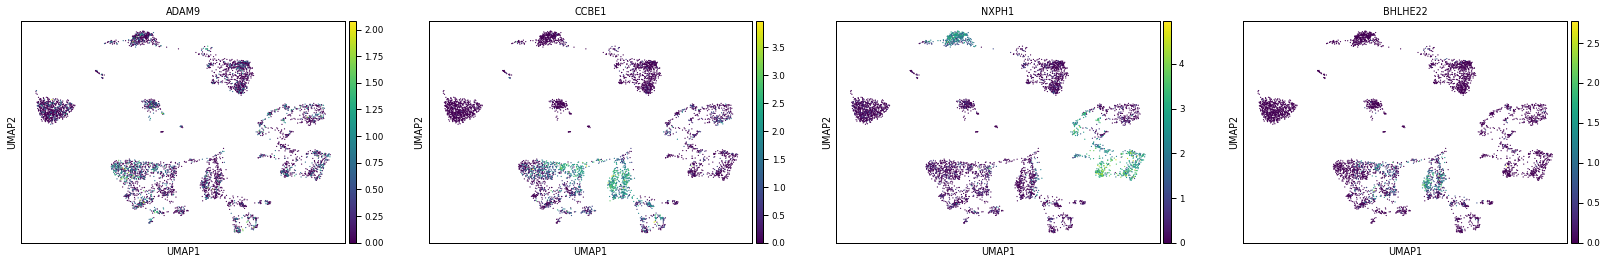

In [57]:
# David - most of the genes aren't here anymore; add new ones
# sc.pl.umap( adata, color=['ADAM9','RRAD','MTRNR2L10','POMC'], size=6)
sc.pl.umap( adata, color=['ADAM9','CCBE1','NXPH1','BHLHE22'], size=6)

###  build matrix for heatmap - comparing major clusts across stages with modules

In [58]:
np.unique( adata.obs['major_clust'].values)

array(['Astro', 'CGE_dev', 'ID2', 'L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS',
       'L5-6_TLE4', 'LAMP5_NOS1', 'MGE_dev', 'Micro', 'OPC', 'Oligo',
       'PN_dev', 'PV', 'PV_SCUBE3', 'SST', 'VIP', 'Vas'], dtype=object)

In [59]:
# reformat cluster names to fit preferred format of major clusters
sst_mk = adata.obs['major_clust']=='SST'
pv_mk  = adata.obs['major_clust']=='PV'
vip_mk = adata.obs['major_clust']=='VIP'
id2_mk = adata.obs['major_clust']=='ID2'
ca1_mk = adata.obs['sub_clust']=='LAMP5_CA1'
scb_mk = np.in1d( adata.obs['sub_clust'], ['PV_SCUBE3','PV_SCUBE3_dev'])

adata.obs['major_clust'] = adata.obs['major_clust'].astype(str)
adata.obs['major_clust'][sst_mk] = 'SST'
adata.obs['major_clust'][pv_mk ] = 'PV'
adata.obs['major_clust'][vip_mk] = 'VIP'
adata.obs['major_clust'][id2_mk] = 'ID2'
adata.obs['major_clust'][ca1_mk] = 'LAMP5_CA1'
adata.obs['major_clust'][scb_mk] = 'PV_SCUBE3'

np.unique( adata.obs['major_clust'].values)

/var/folders/cy/tl1lfdqj7rd2_tx7n2kj_vdr0000gn/T/ipykernel_31738/508381187.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.obs['major_clust'][sst_mk] = 'SST'
/var/folders/cy/tl1lfdqj7rd2_tx7n2kj_vdr0000gn/T/ipykernel_31738/5083811

array(['Astro', 'CGE_dev', 'ID2', 'L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS',
       'L5-6_TLE4', 'LAMP5_NOS1', 'MGE_dev', 'Micro', 'OPC', 'Oligo',
       'PN_dev', 'PV', 'PV_SCUBE3', 'SST', 'VIP', 'Vas'], dtype=object)

In [60]:
# get all modules in a dataframe
all_mods = hs.results.join(hs.modules)
all_mods.dropna( inplace=True)
# drop non assigned genes set to -1.0
all_mods = all_mods[all_mods['Module']!=-1.0]
all_mods.shape

(264, 5)

In [62]:
# David - update output directory
#all_mods.to_csv('/dd_userdata/usrdat03/userdata/cherring/data/cellranger_outputs/brain_maturation_RNA/output_data/whole-tissue_all-cells_DEGs_hotspot-gene-modules.csv')
all_mods.to_csv('../data/output_data/whole-tissue_SUBSET_DEGs_hotspot-gene-modules.csv')

In [63]:
stage_order = ['Fetal', 'Neonatal', 'Infancy', 'Childhood', 'Adolescence', 'Adult']
gene_names = adata.var_names.values

In [64]:
# order clusters to paper styling
major_clusts = ['L2/3_CUX2', 'L4_RORB', 'L5/6_THEMIS', 'L5/6_TLE4', 'PN_dev',
                'VIP', 'ID2', 'LAMP5_CA1', 'CGE_dev',  
                'SST', 'PV', 'PV_SCUBE3', 'MGE_dev',  
                'Astro', 'Oligo', 'OPC',
                'Micro', 'Vas']

In [65]:
# dataframe to hold cluster stage module expression
csme = pd.DataFrame([])
# loop through majors
for clust_itr in major_clusts:
    if( clust_itr=='Poor-Quality'):
        continue
    print( clust_itr)
    # take slice from adata data set
    adata_itr1 = adata[adata.obs['major_clust']==clust_itr]
    # loop through stages
    for stage_itr in stage_order:
        stage_mk = adata_itr1.obs['stage_ids']==stage_itr
        # only want to look at stages with over 10 cells in a cluster
        if( sum( stage_mk)<10):
            continue
        adata_itr2 = adata_itr1[stage_mk]
        ind_nm = f"{stage_itr}_{clust_itr}"
#         print( f"{ind_nm} shape is {adata_itr2.shape}")
        # loop through modules
        for mod_itr in all_mods['Module'].unique():
            if( int(mod_itr)==-1):
                continue
            mod_gene_mk = all_mods['Module']==mod_itr
            mod_genes = all_mods.index.values[mod_gene_mk]
            adata_gene_mk = np.array( dta.member_test( gene_names, mod_genes))
            gene_csr = adata_itr2[:,adata_gene_mk].X
            if( gene_csr.sum(0).sum()==0.0):
                print( f"nothing in {ind_nm}")
                csme.loc[ind_nm,f"Module-{str(int(mod_itr))}"] = 0.0
            else:
                gene_mean = gene_csr.mean(0)
                csme.loc[ind_nm,f"Module-{str(int(mod_itr))}"] = np.mean( gene_mean)

L2/3_CUX2


KeyError: 'stage_ids'

/Users/dmorse/opt/anaconda3/envs/hotspot/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


ValueError: The number of observations cannot be determined on an empty distance matrix.

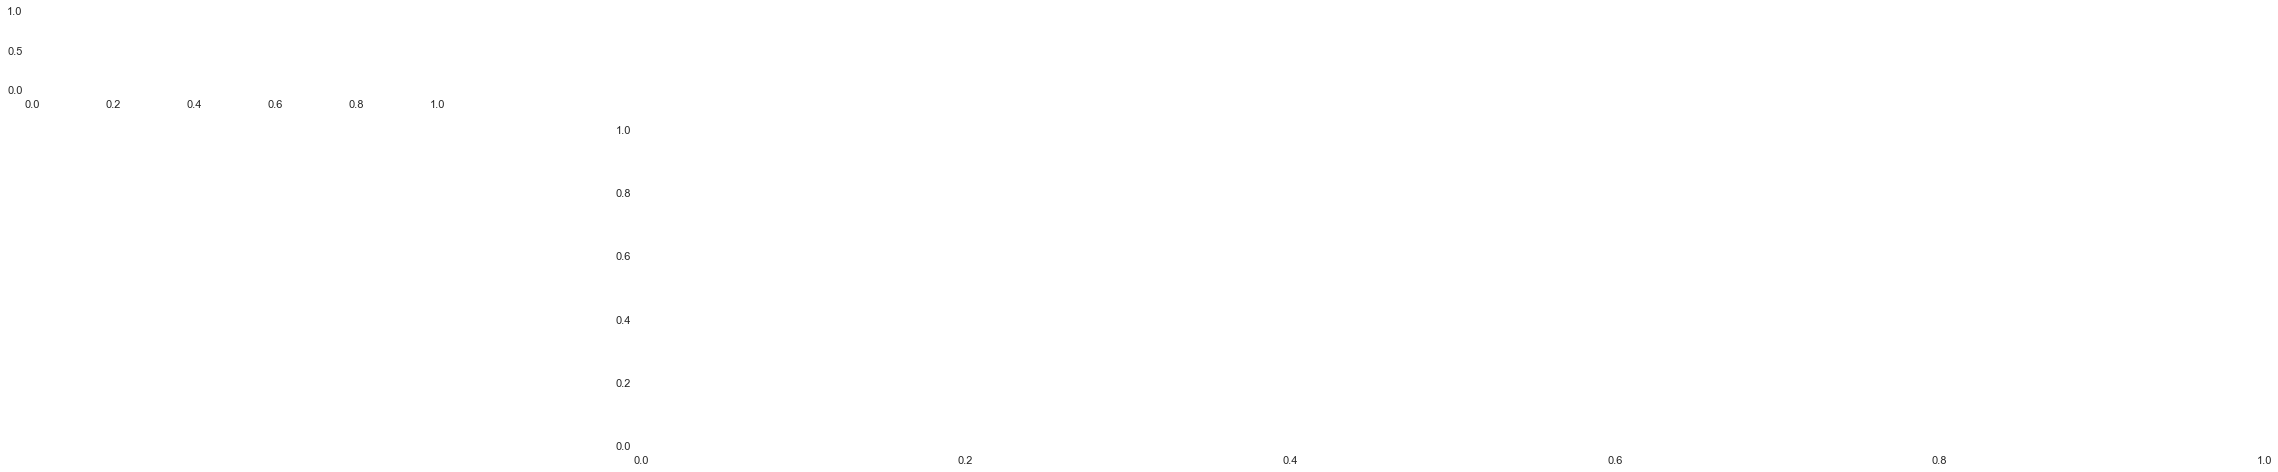

In [66]:
cmap = sns.color_palette( "ch:start=.2,rot=-.3", n_colors=1000)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#                                                                                                                                                     left_rigth,up/down,
g = sns.clustermap( csme.T, col_cluster=False, standard_scale=0, figsize=(40,8), cmap=cmap, yticklabels=csme.columns.values, linewidths=0.025, cbar_pos=(0.25, 0.925, 0.325, 0.05), 
                    cbar_kws={"orientation": "horizontal"})
g.ax_row_dendrogram.set_visible(False)
g.cax.set_visible(True)
plt.setp( g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0);
#plt.savefig( "/dd_userdata/usrdat03/userdata/cherring/data/cellranger_outputs/brain_maturation_RNA/hotspot_dev-majclust-vs-modules.svg", format='svg')
plt.savefig( "../data/output_data/SUBSET_hotspot_dev-majclust-vs-modules.svg", format='svg')

## Get GO terms for each module

In [ ]:
# things to do to clean up module dev plot
# 1 read in non-downsampled data and use it for average expression
# 2 correct scanpy naming convention
# 3 change query back to symbol not ensg
# 4 set query background to genes expressed in whole tissue

#### Change gene symbols back from scanpy unique

In [79]:
# check how many gene names are changed by scanpy var_names_make_unique()
# David - update below to random .h5 file from GEO repo: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM5138509
# gene_file = "/dd_userdata/usrdat03/userdata/cherring/data/cellranger_outputs/brain_maturation_RNA/RL1777_2d_v3/outs/filtered_feature_bc_matrix.h5"
gene_file = "../data/GSM5138509_RL2103_ga22_snRNAseq_filtered_feature_bc_matrix.h5"
# David - random 10x data output from 10x tutoial
# gene_file = "../data/2500_Wistar_Rat_PBMCs_Singleplex_3p_gem-x_Universal_2500_Wistar_Rat_PBMCs_Singleplex_3p_gem-x_Universal_count_sample_filtered_feature_bc_matrix.h5"
test_adata = sc.read_10x_h5( gene_file)
raw_names = test_adata.var_names.values
raw_names

/Users/dmorse/opt/anaconda3/envs/hotspot/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/dmorse/opt/anaconda3/envs/hotspot/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


array(['MIR1302-10', 'FAM138A', 'OR4F5', ..., 'CU459201.1', 'AC002321.2',
       'AC002321.1'], dtype=object)

In [80]:
test_adata.var_names_make_unique()
unq_names = test_adata.var_names.values.tolist()
current_names = all_mods.index.values.tolist()

## Function not working (david)

In [81]:
# def get_preunique_names( current_names, raw_names=raw_names, unq_names=unq_names):
#     raw_current_names = np.zeros_like( current_names)
#     for itr, gene_itr in enumerate( current_names):
#         if gene_itr not in raw_names:
#             raw_current_names[itr] = raw_names[unq_names.index(gene_itr)]
#         else:
#             raw_current_names[itr] = gene_itr
#     print( f"{len( current_names) - sum( dta.member_test( raw_current_names, current_names))} name changes")
#     return( raw_current_names)

## Try a new function (don't run above) (david)

In [82]:
def get_preunique_names(current_names, raw_names=raw_names, unq_names=unq_names):
    raw_current_names = np.zeros_like(current_names, dtype=object)

    for itr, gene_itr in enumerate(current_names):
        if gene_itr not in raw_names:
            raw_current_names[itr] = raw_names[unq_names.index(gene_itr)]
        else:
            raw_current_names[itr] = gene_itr

    # ✅ Replace dta.member_test with np.in1d
    print(f"{len(current_names) - sum(np.in1d(raw_current_names, current_names))} name changes")

    return raw_current_names

In [83]:
all_mods.index = get_preunique_names( current_names)

0 name changes


In [84]:
adata.var_names = get_preunique_names( adata.var_names)
gene_names = adata.var_names

3 name changes


#### Get list of background genes to submit to GO query

In [85]:
gene_sums = (adata.X.sum(0)).A1
gene_mk1 = gene_sums>0
print( sum(gene_mk1))
background = gene_names[gene_mk1].values

7000


In [87]:
!pip install gprofiler-official


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [88]:
from gprofiler import GProfiler
def query_genes( genes, bk_grd=background.tolist(), p_thresh=0.05):
    gp = GProfiler( return_dataframe=True)
    query_df = gp.profile( organism='hsapiens', query=genes, user_threshold=p_thresh, background=bk_grd)
    ####################################################
    # only want moleuclar function and bio processes returned
    query_df = query_df[np.in1d( query_df['source'].values, ['GO:MF','GO:BP'])]
    ####################################################
    # only want less general GOs
#     parent_mk = np.array( [len( ii)>=parent_th for ii in query_df['parents'].values])
    return( query_df) #.loc[parent_mk])

In [89]:
gos = {}
tfs = {}
pvs = {}
inter = {}
parents = {}
mods = np.unique( all_mods['Module'])
for mod_itr in mods:
    itr_mk = all_mods['Module']==mod_itr
    range_genes = all_mods.index.values[itr_mk]
    if( range_genes.size==0):
            gos[f"{ref_itr}_{c_itr}"] = []
            pvs[f"{ref_itr}_{c_itr}"] = []
            inter[f"{ref_itr}_{c_itr}"]  = []
    else:
        q_df = query_genes( range_genes.tolist(), p_thresh=0.999)
        gos[f"Module-{str(int(mod_itr))}"] = q_df["name"].values
        pvs[f"Module-{str(int(mod_itr))}"] = q_df["p_value"].values
        inter[f"Module-{str(int(mod_itr))}"] = q_df["intersection_size"].values
        parents[f"Module-{str(int(mod_itr))}"] = [len(ii) for ii in q_df['parents']]
gos

{'Module-1': array(['extracellular matrix organization',
        'extracellular structure organization',
        'external encapsulating structure organization'], dtype=object),
 'Module-2': array(['transmembrane signaling receptor activity',
        'signaling receptor activity', 'molecular transducer activity',
        'G protein-coupled receptor activity',
        'neurotransmitter receptor activity',
        'G protein-coupled amine receptor activity',
        'G protein-coupled receptor signaling pathway, coupled to cyclic nucleotide second messenger',
        'chemical synaptic transmission',
        'anterograde trans-synaptic signaling', 'trans-synaptic signaling',
        'signaling receptor regulator activity', 'synaptic signaling',
        'cell-cell signaling',
        'G protein-coupled serotonin receptor activity',
        'signaling receptor activator activity',
        'G protein-coupled serotonin receptor signaling pathway',
        'regulation of synaptic transmission

In [90]:
# sort by parent level of go term
def get_lvl_gos( lvl_th, go_terms=gos, p_values=pvs, intersect=inter, parents=parents):
    lvl_gos = {}
    lvl_pvs = {}
    lvl_int = {}
    for key_itr in go_terms.keys():
        lvl_gos[key_itr] = [go for go, par in zip( go_terms[key_itr],  parents[key_itr]) if par==lvl_th]
        lvl_pvs[key_itr] = [pv for pv, par in zip( p_values[key_itr],  parents[key_itr]) if par==lvl_th]
        lvl_int[key_itr] = [te for te, par in zip( intersect[key_itr], parents[key_itr]) if par==lvl_th]
    return( lvl_gos, lvl_pvs, lvl_int)

In [91]:
lvl1_gos, lvl1_pvs, lvl1_int = get_lvl_gos( 1)
lvl2_gos, lvl2_pvs, lvl2_int = get_lvl_gos( 2)
lvl3_gos, lvl3_pvs, lvl3_int = get_lvl_gos( 3)
lvl4_gos, lvl4_pvs, lvl4_int = get_lvl_gos( 4)

In [92]:
# assumes go_dict is already sorted by p-value
def get_n_top_gos( go_dict, pv_dict, in_dict, N):
    top_g_dict = {}
    top_p_dict = {}
    top_i_dict = {}
    for k_itr in go_dict.keys():
        go_itr = go_dict[k_itr]
        pv_itr = pv_dict[k_itr]
        in_itr = in_dict[k_itr]
        top_g_dict[k_itr] = go_itr[:N]
        top_p_dict[k_itr] = pv_itr[:N]
        top_i_dict[k_itr] = in_itr[:N]
    return( top_g_dict, top_p_dict, top_i_dict)

In [93]:
###################################################################
######### here is where you control level of GO terms
###################################################################
top_gos_dict, top_pvs_dict, top_int_dict = get_n_top_gos( lvl2_gos,lvl2_pvs, lvl2_int, 5)

In [94]:
# create dataframe to hold p-values for mods and go terms
col_names = []
for vals in top_gos_dict.values():
    col_names = np.append( col_names, vals)
print( col_names.shape)
col_names = np.unique( col_names)
print( col_names.shape)

(5,)
(5,)


In [95]:
gm_df = pd.DataFrame( [], index=list( top_gos_dict.keys()), columns=col_names, dtype=float)
in_df = pd.DataFrame( [], index=list( top_gos_dict.keys()), columns=col_names, dtype=int)
gm_df.iloc[:,:] = np.log10( 1.0)
in_df.iloc[:,:] = 0

In [96]:
-np.log10(1.0), -np.log10( 0.05), -np.log10( 0.0000005)

(-0.0, 1.3010299956639813, 6.301029995663981)

In [97]:
for mod_itr in gos.keys():
    pvs_itr = top_pvs_dict[mod_itr]
    gos_itr = top_gos_dict[mod_itr]
    for p_itr, go_itr in zip( pvs_itr, gos_itr):
        gm_df.loc[mod_itr,go_itr] = -np.log10( p_itr)    
        
for mod_itr in gos.keys():
    in_itr  = top_int_dict[mod_itr]
    gos_itr = top_gos_dict[mod_itr]
    for i_itr, go_itr in zip( in_itr, gos_itr):
        in_df.loc[mod_itr,go_itr] = i_itr

In [98]:
gm_df.index.values

array(['Module-1', 'Module-2'], dtype=object)

In [99]:
#######################
ttt = 0.05
th = -np.log10(ttt)
# gm_df[gm_df>=th] = th
#######################

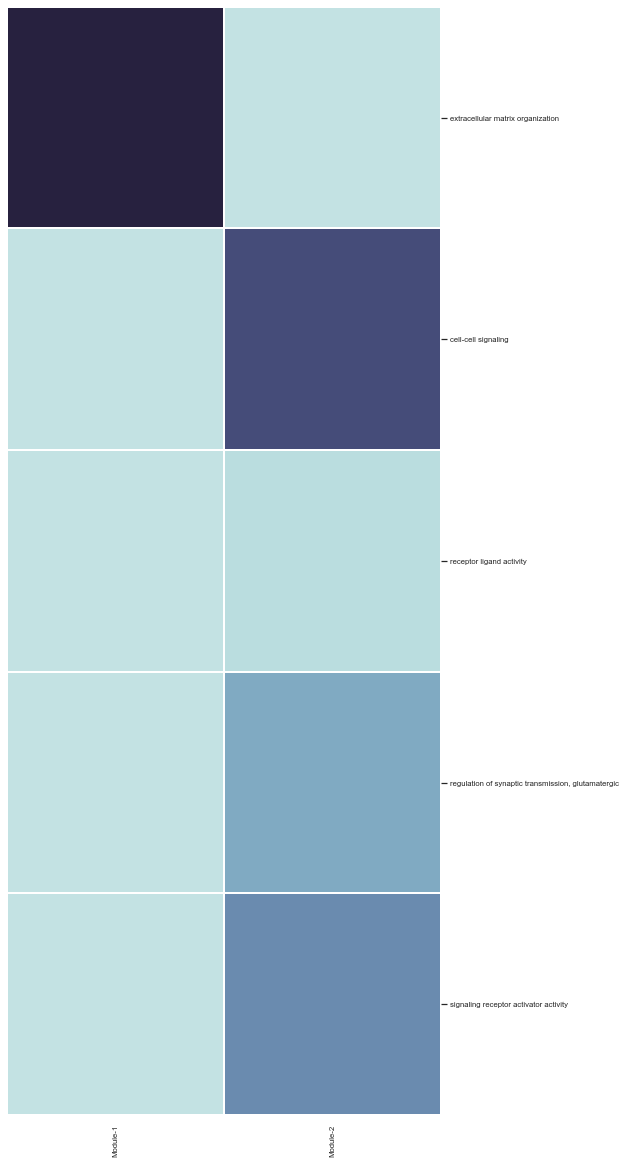

In [100]:
sns.set(font_scale=0.70)
g = sns.clustermap( gm_df.T, col_cluster=True, figsize=(8,20), cmap=cmap, cbar_pos=(0.15, 0.825, 0.525, 0.012), 
                    cbar_kws={"orientation": "horizontal"}, linewidths=0.025)#, "ticks":-np.log10([1,0.05,0.005])})#, "ticklabels":["1.0", "0.05", "0.005"]})
g.ax_col_dendrogram.set_visible(False)
g.ax_row_dendrogram.set_visible(False)
plt.setp( g.ax_heatmap.xaxis.get_majorticklabels(), rotation=90);
plt.setp( g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0);
g.cax.set_visible( False)

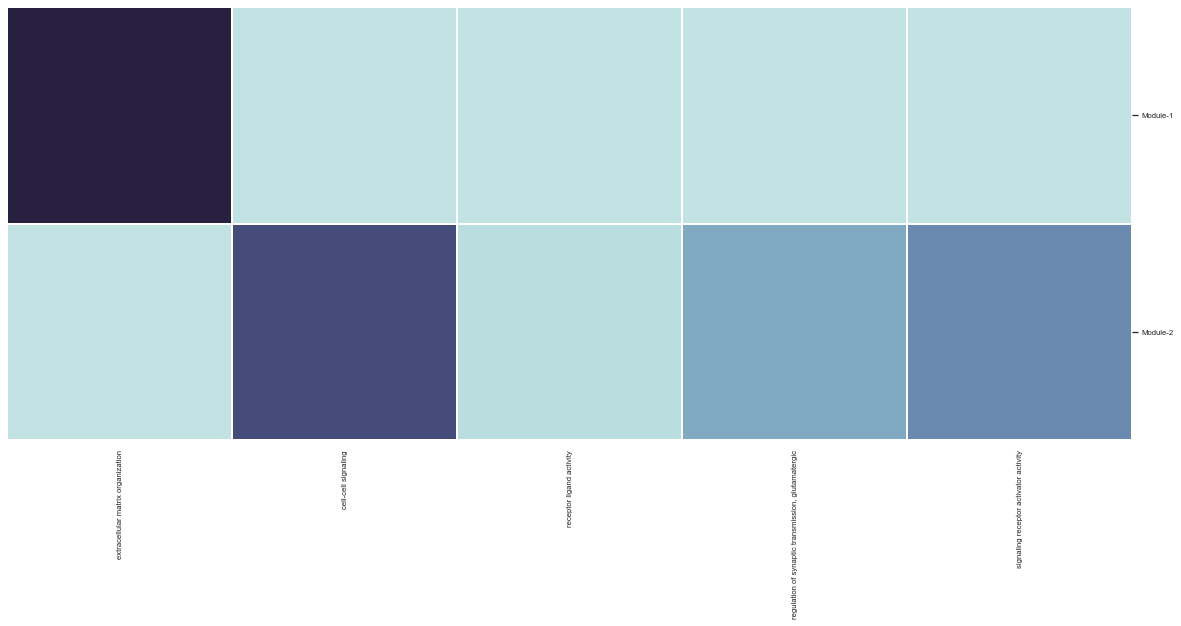

In [101]:
sns.set(font_scale=0.70)
g = sns.clustermap( gm_df, col_cluster=True, figsize=(20,8), cmap=cmap, cbar_pos=(0.15, 0.825, 0.525, 0.012), 
                    cbar_kws={"orientation": "horizontal"}, linewidths=0.025)#, "ticks":-np.log10([1,0.05,0.005])})#, "ticklabels":["1.0", "0.05", "0.005"]})
g.ax_col_dendrogram.set_visible(False)
g.ax_row_dendrogram.set_visible(False)
plt.setp( g.ax_heatmap.xaxis.get_majorticklabels(), rotation=90);
plt.setp( g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0);
g.cax.set_visible( False)
# plt.savefig( "/dd_userdata/usrdat03/userdata/cherring/data/cellranger_outputs/brain_maturation_RNA/hotspot_GOs-vs-modules.svg", format='svg')

In [102]:
gm_df.to_csv( "../data/output_data/hotspot_GOs-vs-modules_dataframe.csv")
in_df.to_csv( "../data/output_data/hotspot_GOs-vs-modules_dataframe_intersect.csv")

## Extras

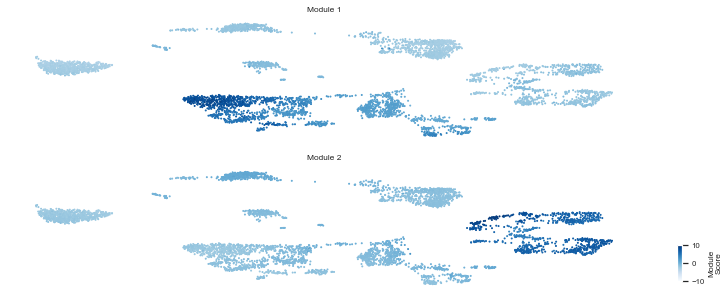

In [103]:
 # subplot params
n    = max( hs.modules.unique())
cols = round( math.sqrt( n))
rows = math.ceil( n / cols)
size = cols * rows

fig, axs = plt.subplots( rows, cols, figsize=(rows*5,cols*5))
cax = fig.add_axes(
    [.95, .15, .007, .1]
)
for itr, (ax, mod) in enumerate( zip( axs.ravel(), hs.module_scores.columns)):
    ax.set_facecolor( 'white')
    scp = hs.module_scores[mod]
    vmin = -10
    vmax = 10
    plt.sca(ax)
    scp = plt.scatter(
        umap[:,0], umap[:,1],
        s=1, c=scp, vmin=vmin, vmax=vmax,
        rasterized=True, cmap='Blues')
    plt.xticks([])
    plt.yticks([])
    plt.title("Module {}".format(mod))
# clear rest of graphs
for ii in range( itr+1, size):
    ax = axs.flatten()[ii]
    ax.axis('off')
        
plt.subplots_adjust(hspace=0.2)
plt.colorbar(scp, cax=cax, label='Module\nScore')
plt.subplots_adjust(left=0.02, right=0.9)

In [104]:
first_go = np.array( [f"{mods[itr]}--{ii[:10]}" for itr, ii in enumerate( gos)])
# first_go

In [105]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

def get_row_order( fits):
    row_linkage = hierarchy.linkage(
        distance.pdist( fits, metric='euclidean'), method='average')
    leaf_order = hierarchy.leaves_list( row_linkage)
    return( leaf_order)

In [106]:
import textwrap
cmap = sns.color_palette( "ch:start=.2,rot=-.3", n_colors=1000)
sns.set(font_scale=0.75)
ro = get_row_order( csme.T.values)
row_order = csme.T.index.values[ro]
ylabs = [first_go[int(ii)-1] for ii in row_order]
g = sns.clustermap( csme.T.loc[row_order,:], col_cluster=False, standard_scale=0, figsize=(15,25), cmap=cmap, square=False, yticklabels=[textwrap.fill(e, 50) for e in ylabs])

ValueError: The number of observations cannot be determined on an empty distance matrix.

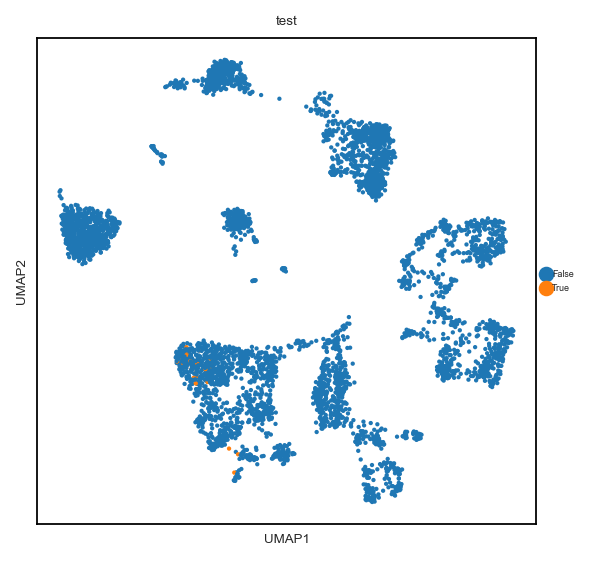

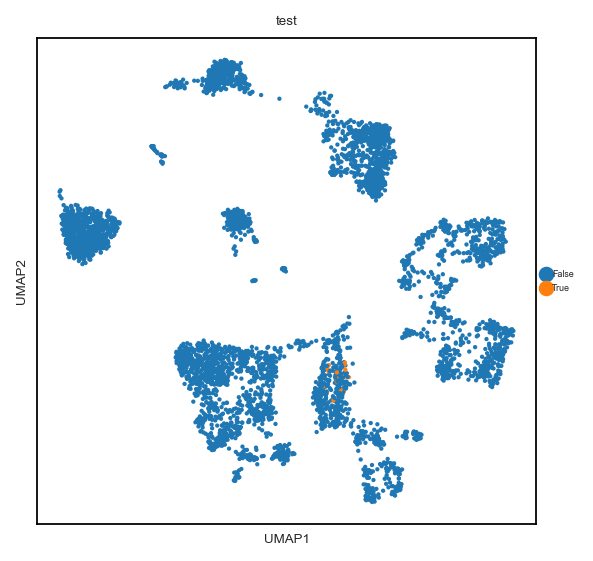

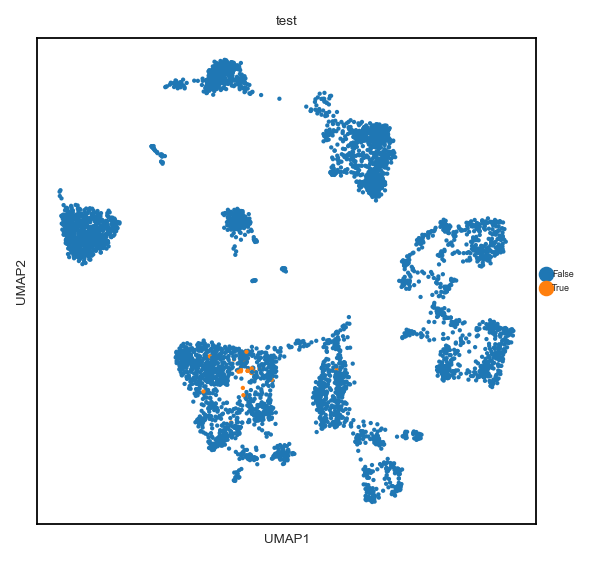

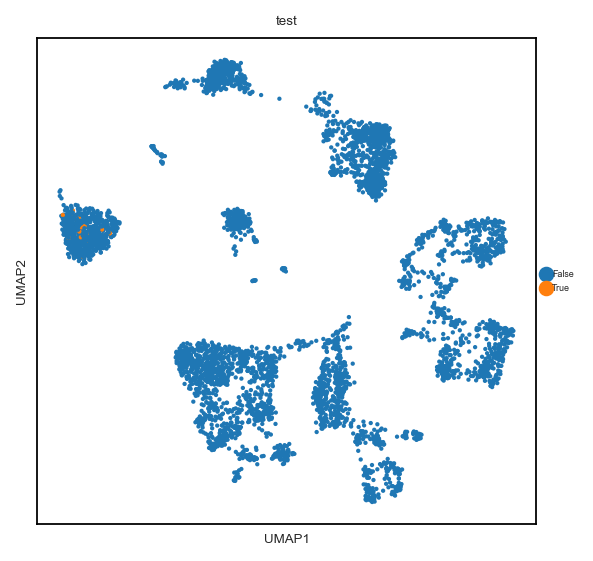

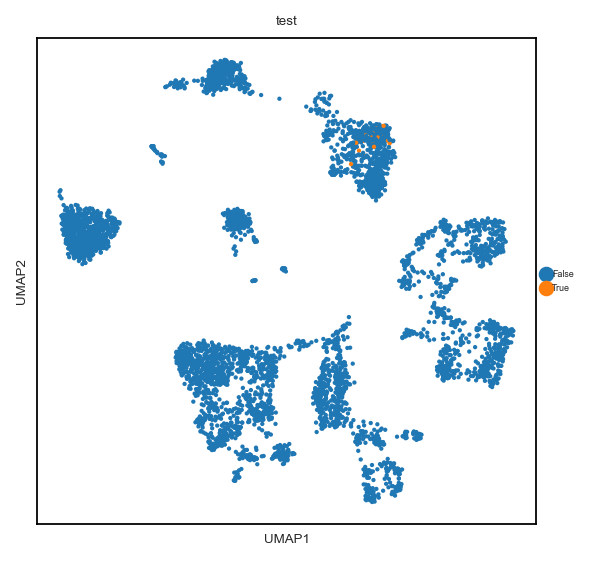

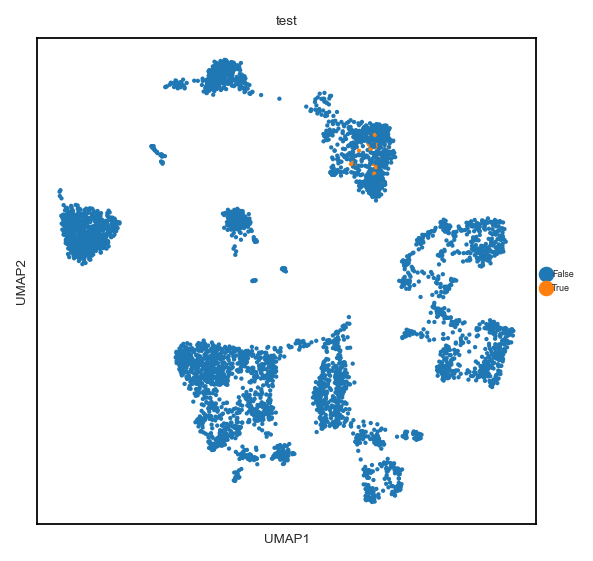

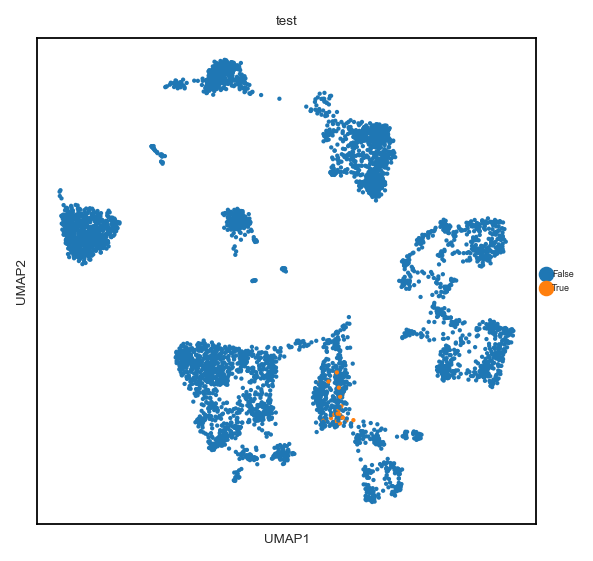

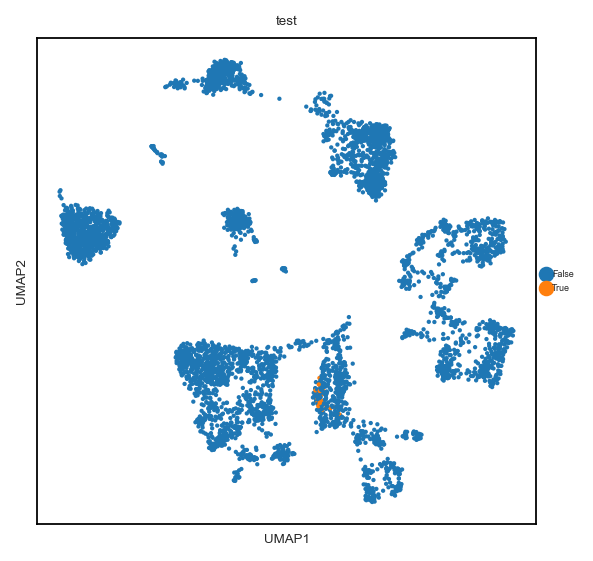

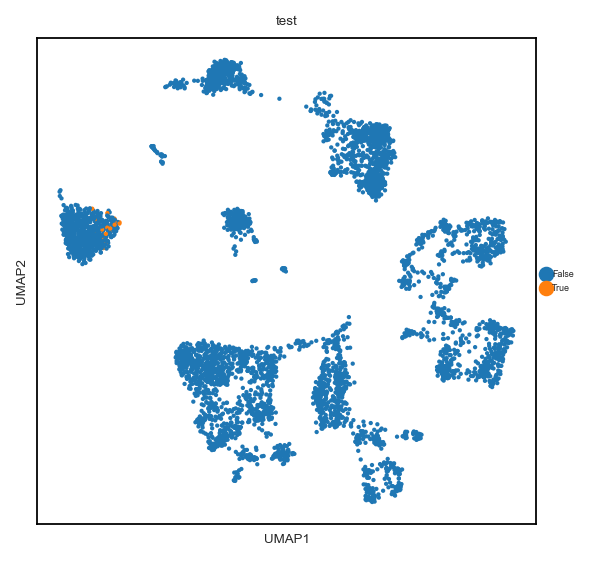

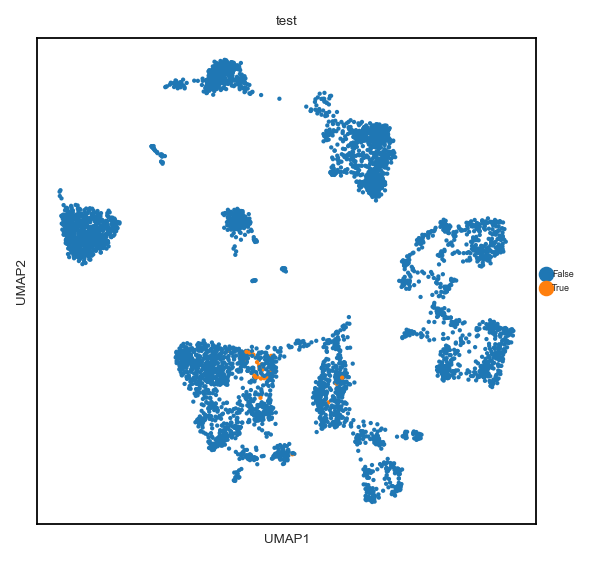

In [107]:
sc.settings.set_figure_params( dpi=80, fontsize=6, color_map='cool')
for itr in np.random.randint( 0, hs.neighbors.shape[0], size=10):
    t_mk = np.array( [ii in hs.neighbors.iloc[itr,:].values for ii in range(adata.shape[0])])
    adata.obs['test'] = t_mk
    sc.pl.embedding( adata, basis='umap', color=['test'], legend_fontsize=4, add_outline=False, size=15, legend_fontoutline=0.2, sort_order=True)